In [3]:
import matplotlib.pyplot as plt
import random
from scipy.stats import pareto
import numpy as np

def pareto_simulation(sample, alpha = 2, lambd = 1):
    us = []
    for i in range(sample):
        us.append(random.random())
    return [lambd * ((1-u)**(-1/alpha) - 1) for u in us]

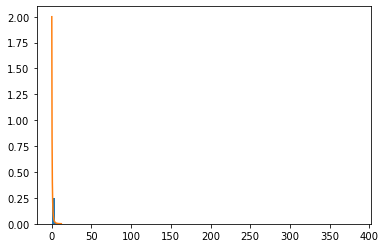

In [4]:
simul = pareto_simulation(1000)
xs2 = np.linspace(0,12,1000)
plt.hist(simul, bins=100, density=True)
plt.plot(xs2, pareto.pdf(xs2, 2, loc=-1))
plt.show()

Zadanie 4

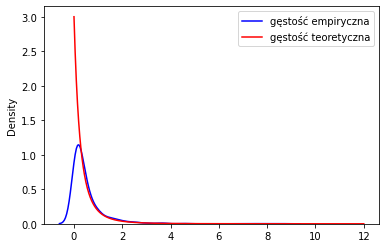

In [7]:
import seaborn as sns
simul1 = pareto_simulation(1000,3,1)
sns.kdeplot(simul1, label="gęstość empiryczna", color="blue")
plt.plot(xs2,pareto.pdf(xs2, 3, loc = -1, scale = 1), label = "gęstość teoretyczna", color="red")
plt.legend(loc="best")
plt.show()

Zadanie 5


In [8]:
def burr_simulation(sample, r = 1, alpha = 2, lambd = 1):
    us = []
    for i in range(sample):
        us.append(random.random())
    return [(lambd * ((1-u)**(-1/alpha) - 1))**(1/r) for u in us]

In [17]:
def burr_density(x,tau, alpha, lambd):
    return [tau*x[i]**(tau-1)*((lambd**alpha*alpha)/((x[i]**tau+lambd)**(alpha+1))) for i in range(len(x))]
    

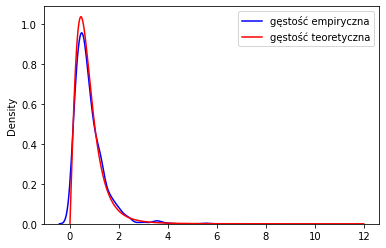

In [19]:
from scipy.stats import burr
simul_burr = burr_simulation(1000, 2) #symulowanie 1000 obserwacji
sns.kdeplot(simul_burr,label="gęstość empiryczna", color = "blue")
plt.plot(xs2, burr_density(xs2, 2, 2, 1), label="gęstość teoretyczna", color="red")
plt.legend(loc="best")
plt.show()

In [20]:
def burr_cdf(x, tau,alpha, lambd):
    return [(1 - (lambd/(lambd + x[i]**tau)**alpha)) for i in range(len(x))]

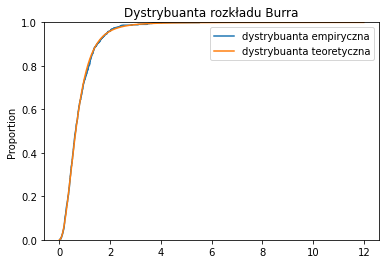

In [21]:
sns.ecdfplot(data=simul_burr, label="dystrybuanta empiryczna")
plt.plot(xs2, burr_cdf(xs2, 2,2,1), label='dystrybuanta teoretyczna')
plt.legend(loc="best")
plt.title("Dystrybuanta rozkładu Burra")
plt.show()

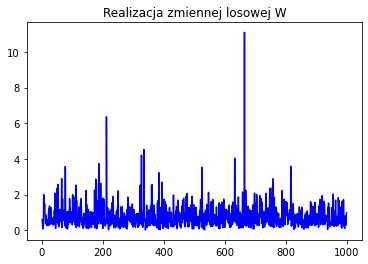

In [16]:
xs3 = np.linspace(1,1000,1000)
plt.plot(xs3, simul_burr, color="blue")
plt.title("Realizacja zmiennej losowej W")
plt.show()